# Содержание
* [1  Описание Задачи](#1)
    * [1.1  Описание установки](#1.1)
    * [1.2  Бизнес-проблема](#1.2)
    * [1.3  Метрики](#1.3)
    * [1.4  Описание данных](#1.4)
    * [1.5  Структура данных](#1.5)
* [2  Анализ данных](#2)
    * [2.1  Загрузка данных](#2.1)
    * [2.2  Обобщенная информация о данных](#2.2)
* [3  Выводы](#3)

<a id="1"></a>
# 1 Описание Задачи

<a id="1.1"></a>
## 1.1 Описание общего бизнес-процесса

**Процесс управления требованиями**
состоит из нескольких основных этапов:


1. Сбор 
2. Формализация 
3. Анализ 
4. Классифкаиця требований (по главам)
5. Планирование требований (соотнесение требований с элементами АЭС)
6. Трассировка требований (отслеживание реализации требований)



<a id="1.2"></a>
## 1.2 Бизнес-проблема

В настоящее время классификация требований производится вручную при помощи экспертов из проектного блока. Занимает порядка нескольких месяцев на критическом пути Проекта и несколько тысяч человеко-часов экспертов из Проектного блока.

Предлагается внедрить модель машинного обучения, которая будет осуществлять предварительную классификацию требований.

<a id="1.3"></a>
## 1.3 Метрики

- Гармоническое среднее между точностью и полнотой
 
 $$Precision = \frac{TP}{TP+FP}$$
 
 $$Recall = \frac{TP}{TP+FN}$$
 
 $$F1 = \frac{2 * precision * recall}{precision + recall}$$
 
 
 - Средняя точность по оценкам прогнозов
 
 $$AP = \sum\limits _{n}{(R_n-R_{n-1})*P_n}$$
 где \\( P_n\\) - точность на **n**-пороге, \\( R_n\\) - полнота на **n**-пороге.

Так же, для сравнение результатов работы алгоритма, можно рассмотреть метрики описанные в https://github.com/waico/SKAB/blob/master/utils/evaluating.py. 

<a id="1.4"></a>
## 1.4 Описание данных

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
pd.set_option('display.max_colwidth',1000)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.read_csv('train_test_withcols1.csv')

Данные получены из единого файла с требованиями к программному обеспечению.

 

<a id="1.5"></a>
## 1.5 Структура данных 

начальный файл выглядит слудеющим образом:

In [5]:
data.head(2)

,req_no,requirement,req_type,test_scenario,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards"
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,"['account','contact','feature & function']","['Verification of Account Details and Settings' , 'Verification of Contact Details' , 'Verification of Features and Functions']",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,"['account','design & content','feature & function']","['Verification of Account Details and Settings' , 'Verification of Design and Content' , 'Verification of Features and Functions']",1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


В начальном файле есть 2 колонки, которые мы не будем использовать, потому что они являются результатом классификации, а не параметром.

req_type

test_scenario

In [6]:
data = data.drop('req_type', 1)
data = data.drop('test_scenario', 1)
data = data.rename(columns={'requirement': 'requirement_text'})

In [7]:
requirement_classes = list(data.columns[2:].values)

In [8]:
data.head(2)

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards"
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dataset состоит из 2 основных колонок и 26 дополнительных:

*req_no* – номер требования

*requirement* – текст требования

*req_type* – тип требования – перечень классов, с которыми ассоциируется то или иное требование

*test_scenario* – Сценарий тестирования – соответсвует классу требования

Остальные колонки являются разметкой отношения требованиq к тому или иному классу

In [9]:
for i in range(len(data.columns)):
  print (data.columns[i])
print (i)

req_no
requirement_text
Verification of Account Details and Settings
Verification of the Authentication and Authorization process
Verification of Contact Details
Verification of Customer Support
Verification of Data Integrity and Consistency
Verification of Design and Content
Verification of Downloads
Verification of Error Handling
Verification of Features and Functions
Verification of Forms and Validation of Input
Verification of Home Page
Verification of Language Compatibility
Verification of Links
Verification of Navigation
Verification of Notifications and Alerts
Verification of Password Policy and Setup
Verification of the Payment flow and details
Verification of Performance
Verification of the Product Page and Products
Verification of Search and Search Engine Optimization(SEO)
Verification of Security and Privacy Policy Set Up
Verification of Social Media Links and Icons
Verification of Supportability and Device Compatibility
Verification of Usability and Accessibility 
Verificat

**## Классы требований**

In [10]:
requirement_classes

['Verification of Account Details and Settings',
 'Verification of the Authentication and Authorization process',
 'Verification of Contact Details',
 'Verification of Customer Support',
 'Verification of Data Integrity and Consistency',
 'Verification of Design and Content',
 'Verification of Downloads',
 'Verification of Error Handling',
 'Verification of Features and Functions',
 'Verification of Forms and Validation of Input',
 'Verification of Home Page',
 'Verification of Language Compatibility',
 'Verification of Links',
 'Verification of Navigation',
 'Verification of Notifications and Alerts',
 'Verification of Password Policy and Setup',
 'Verification of the Payment flow and details',
 'Verification of Performance',
 'Verification of the Product Page and Products',
 'Verification of Search and Search Engine Optimization(SEO)',
 'Verification of Security and Privacy Policy Set Up',
 'Verification of Social Media Links and Icons',
 'Verification of Supportability and Device Co

<a id="2"></a>
# 2 Анализ данных

## Обобщенная информация о данных

In [11]:
display(Markdown('<br>__Количество экспериментов в каждой группе:__'))
print('Количество требований: ', len(data))
print ('Количество классов требований: ', len(requirement_classes))

<br>__Количество экспериментов в каждой группе:__

Количество требований:  1390
Количество классов требований:  26


In [12]:
data.describe()

,req_no,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards"
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,695.500000,0.015108,0.100000,0.024460,0.020144,0.036691,0.208633,0.017266,0.037410,0.233813,0.041007,0.025180,0.021583,0.084173,0.044604,0.032374,0.024460,0.035971,0.074820,0.035252,0.079856,0.096403,0.017266,0.061151,0.068345,0.024460,0.124460
std,401.402749,0.122026,0.300108,0.154529,0.140543,0.188069,0.406478,0.130308,0.189833,0.423407,0.198378,0.156727,0.145369,0.277747,0.206508,0.177055,0.154529,0.186285,0.263196,0.184482,0.271168,0.295249,0.130308,0.239693,0.252428,0.154529,0.330225
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,348.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,695.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1042.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1390.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   req_no                                                                    1390 non-null   int64 
 1   requirement_text                                                          1390 non-null   object
 2   Verification of Account Details and Settings                              1390 non-null   int64 
 3   Verification of the Authentication and Authorization process              1390 non-null   int64 
 4   Verification of Contact Details                                           1390 non-null   int64 
 5   Verification of Customer Support                                          1390 non-null   int64 
 6   Verification of Data Integrity and Consistency                          

<a id="2.2.1"></a>
### 2.2.1 Среднее количество слов в требовании

In [14]:
round(data['requirement_text'].str.split(" ").apply(len).mean())

19

<a id="2.2.4"></a>
### 2.2.4 Пропуски и выбросы в данных, шум
Не всегда пропуски в данных можно определить методом pandas isna(). Пропуски в данных могут обозначаться 0 или другими значениями. Оценим наличие пропусков и выбросов с помощью графиков.

In [15]:
data.requirement_text.apply(pd.isna).value_counts()

False    1390
Name: requirement_text, dtype: int64

в полученном dataset нет пропущенных значений

<a id="2.2.4.1"></a>

---


#### 2.2.4.1 анализ классов требований
Для оценки пропусков, выбросов и шумов выведем графики трендов для каждого сигнала

In [16]:
data.head()

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards"
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,User accounts are password protected,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Account info change access,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data['number_of_classes'] = data.loc[:,requirement_classes].sum(axis=1)
data.head()

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards",number_of_classes
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,4,User accounts are password protected,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,Account info change access,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


(array([845., 385., 106.,  25.,  16.,   7.,   3.,   1.,   1.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

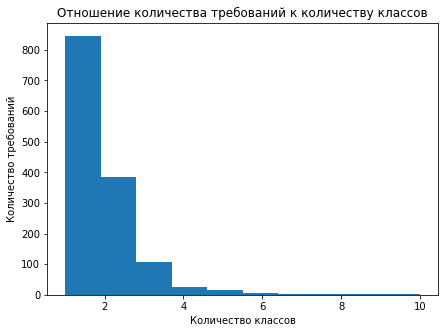

In [18]:
plt.figure(figsize=(7,5))
plt.title('Отношение количества требований к количеству классов')
plt.xlabel('Количество классов')
plt.ylabel('Количество требований')
plt.hist(data.number_of_classes,bins=10)

In [19]:
data.number_of_classes.value_counts()

1     845
2     385
3     106
4      25
5      16
6       7
7       3
8       1
9       1
10      1
Name: number_of_classes, dtype: int64

Большинство требований (845) относится к 1 классу,
к 2 классам относится 385 требований.
К 8, 9, 10 классам отноится по 1 требованию.

Text(0, 0.5, 'Количество требований')

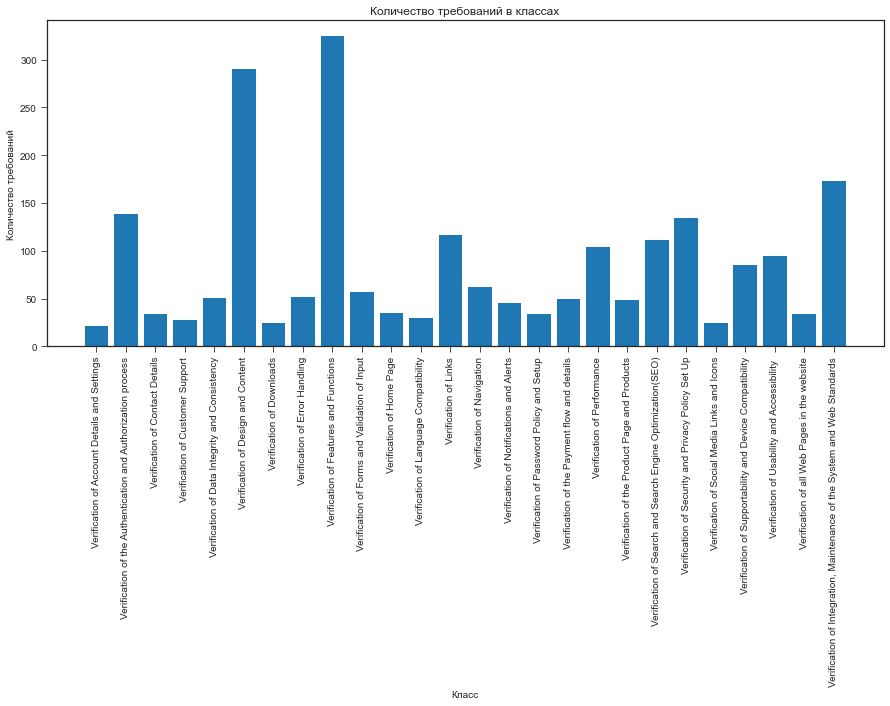

In [20]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-ticks')
plt.xticks(rotation=90)

names = requirement_classes
values = data.iloc[:,2:-1].sum(axis=0)

plt.bar(data.columns[2:-1],values)
plt.title('Количество требований в классах')
plt.xlabel('Класс')
plt.ylabel('Количество требований')

In [21]:
data.loc[:,requirement_classes].sum(axis=0).sort_values(ascending=False)

Verification of Features and Functions                                      325
Verification of Design and Content                                          290
Verification of Integration, Maintenance of the System and Web Standards    173
Verification of the Authentication and Authorization process                139
Verification of Security and Privacy Policy Set Up                          134
Verification of Links                                                       117
Verification of Search and Search Engine Optimization(SEO)                  111
Verification of Performance                                                 104
Verification of Usability and Accessibility                                  95
Verification of Supportability and Device Compatibility                      85
Verification of Navigation                                                   62
Verification of Forms and Validation of Input                                57
Verification of Error Handling          

В классах 
Verification of Features and Functions                                      325
Verification of Design and Content                                          290


заметно большее количество требований. 

Посмотрим самые часто встерчаемые слова в текстах

In [22]:
all_words = data['requirement_text'].str.split(expand=True).unstack().value_counts()

<BarContainer object of 30 artists>

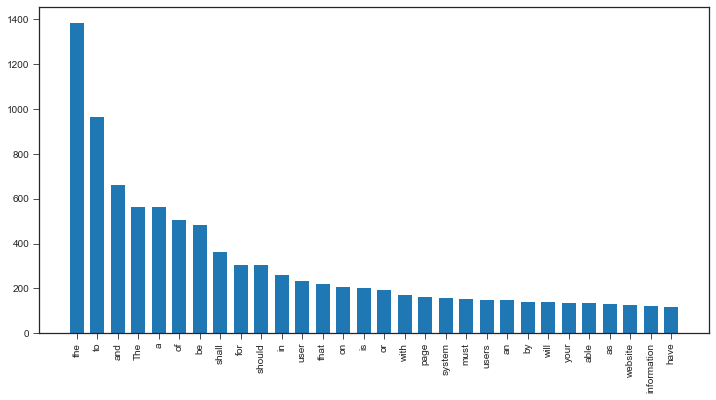

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.bar(all_words.index.values[0:30], all_words.values[0:30],width=0.7)

## Лемматизация

Убираем множественное число, времена и тд


In [24]:
import nltk

In [25]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ivankhomiakov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
def lemmatization(text):
    '''a function for lemmatization'''
    text = [lemmatizer.lemmatize(word.lower()) for word in text.split()]
    # joining the list of words with space separator
    return " ".join(text)

In [27]:
data['lemmatized_requirement'] = data['requirement_text'].apply(lemmatization)

In [28]:
data[['requirement_text','lemmatized_requirement']].head(2)

,requirement_text,lemmatized_requirement
0,System shall allow users to update their billing and contact information via the “My Account” section of the website,system shall allow user to update their billing and contact information via the “my account” section of the website
1,View User profile information,view user profile information


Убираем стоп-слова

In [29]:
from nltk.corpus import stopwords
import nltk


In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivankhomiakov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
sw = stopwords.words('english')
len(sw)

179

In [32]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words 
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [33]:
data['lemmatized_requirement'] = data['lemmatized_requirement'].apply(stopwords)

In [34]:
data[['requirement_text','lemmatized_requirement']].tail(1)

,requirement_text,lemmatized_requirement
1389,Data should be up to date and easily maintainable - or where up-to-date data is not available indication of how recent the data is.\r\nData should be validated to at least a basic level - the information should be validated (or its validation status indicated) by the organisation itself and an external authority should confirm that the organisation exists and the core information is correct. This is necessary to ensure that at a minimum that 1) at least users can begin to validate the information themselves via the organisations Web site and 2) that inappropriate organisations do not attempt to register as part of the directory.,data date easily maintainable - up-to-date data available indication recent data is. data validated least basic level - information validated (or validation status indicated) organisation external authority confirm organisation exists core information correct. necessary ensure minimum 1) least user begin validate information via organisation web site 2) inappropriate organisation attempt register part directory.


Убираем знаки препинания

In [35]:
import re
regex = re.compile('[^a-zA-Z а-яА-Я]')

In [36]:
data.lemmatized_requirement = data.lemmatized_requirement.apply(lambda x: regex.sub('',x))

In [37]:
data[['requirement_text','lemmatized_requirement']].tail(1)

,requirement_text,lemmatized_requirement
1389,Data should be up to date and easily maintainable - or where up-to-date data is not available indication of how recent the data is.\r\nData should be validated to at least a basic level - the information should be validated (or its validation status indicated) by the organisation itself and an external authority should confirm that the organisation exists and the core information is correct. This is necessary to ensure that at a minimum that 1) at least users can begin to validate the information themselves via the organisations Web site and 2) that inappropriate organisations do not attempt to register as part of the directory.,data date easily maintainable uptodate data available indication recent data is data validated least basic level information validated or validation status indicated organisation external authority confirm organisation exists core information correct necessary ensure minimum least user begin validate information via organisation web site inappropriate organisation attempt register part directory


## Посмотрим частоту вхождения слов в тексты требований в зависимости от класса

Сформируем словарь из 10 самых популярных слов для каждого класса

In [38]:
class_dict = dict()
for c in range(len(requirement_classes)):
    class_dict[requirement_classes[c]] = data[data[requirement_classes[c]]==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts().head(15)

In [39]:
class_dict

{'Verification of Account Details and Settings': user           27
 contact        23
 account        17
 information    12
 field          11
 shall           7
 number          7
 address         6
 website         6
 id              6
 include         6
 password        6
 email           6
 profile         6
 phone           6
 dtype: int64,
 'Verification of the Authentication and Authorization process': user           130
 shall           40
 password        36
 page            33
 application     32
 system          32
 able            31
 authorized      28
 login           28
 access          27
 must            26
 register        17
 data            15
 use             15
 log             14
 dtype: int64,
 'Verification of Contact Details': contact        57
 page           26
 link           23
 information    22
 provide        17
 user           13
 include        11
 number         11
 address        11
 phone          11
 site           10
 email          10
 detail   

In [40]:
class_dict[requirement_classes[0]].index[0]

'user'

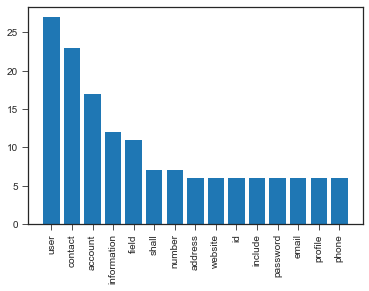

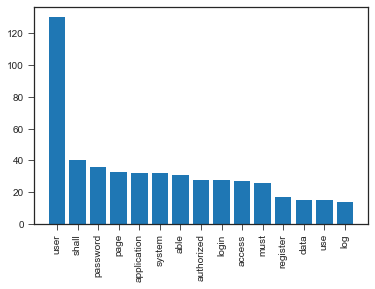

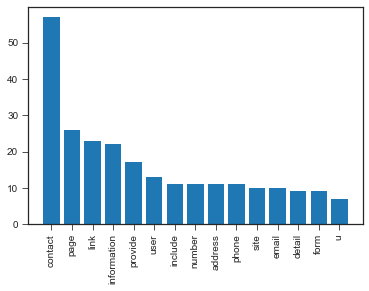

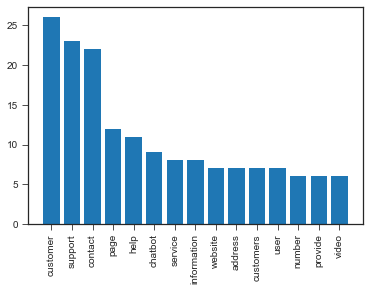

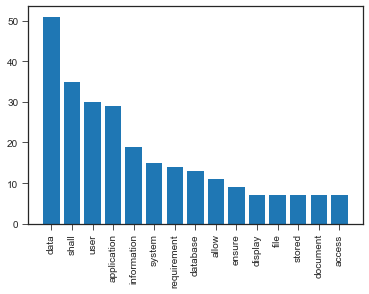

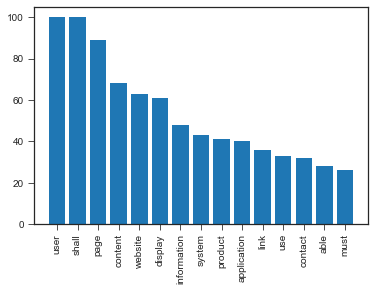

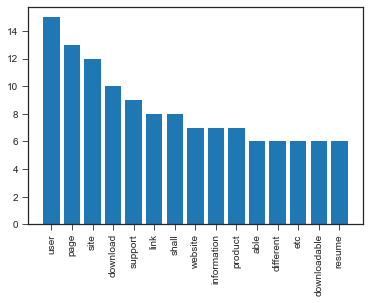

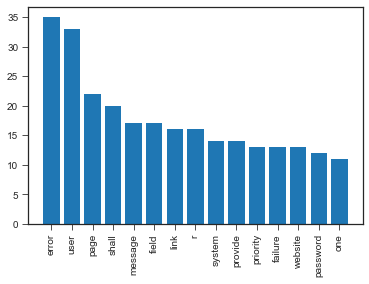

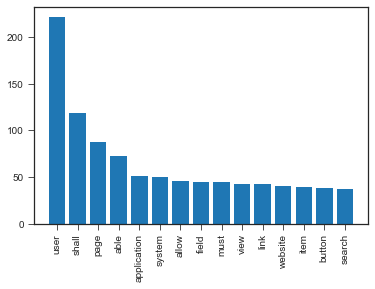

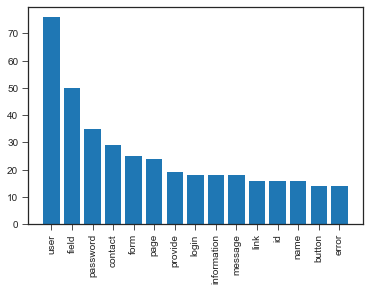

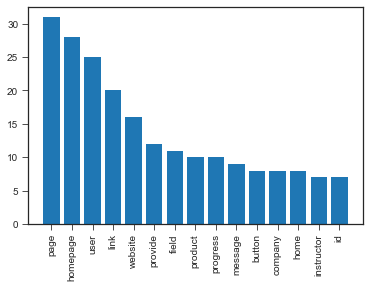

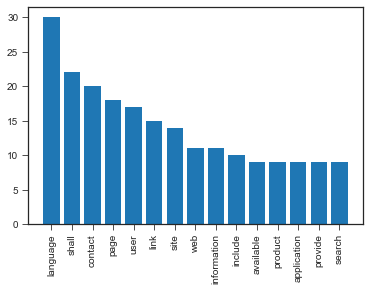

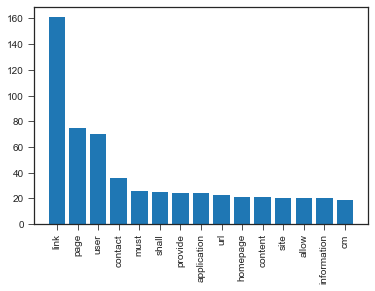

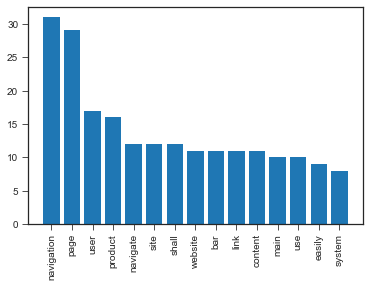

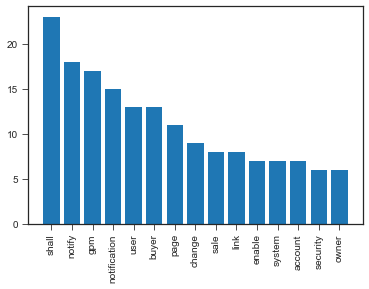

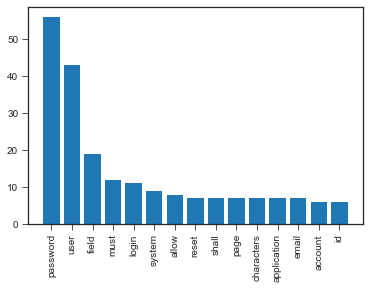

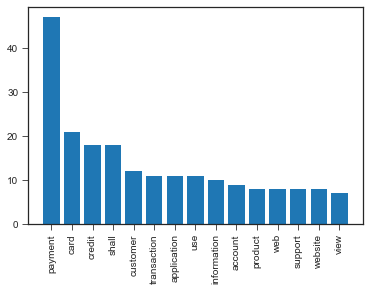

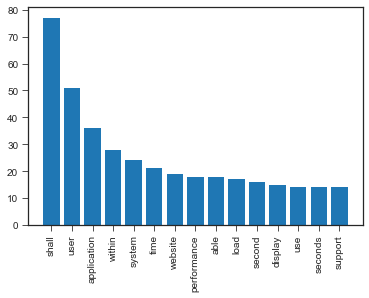

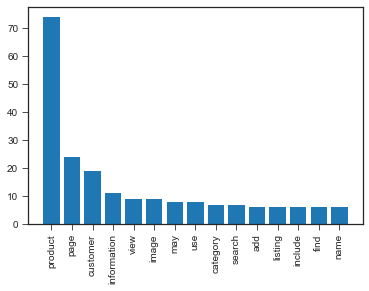

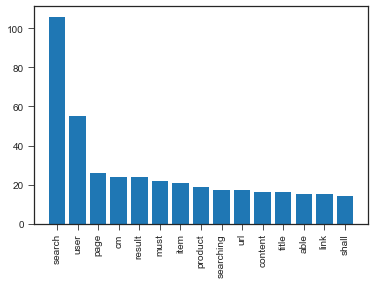

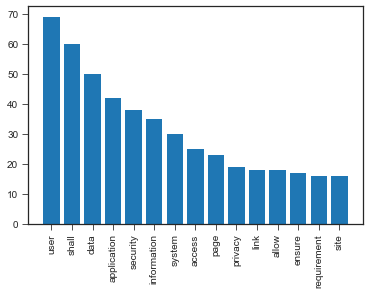

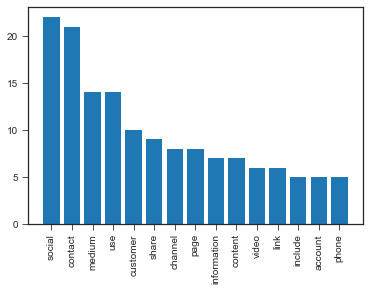

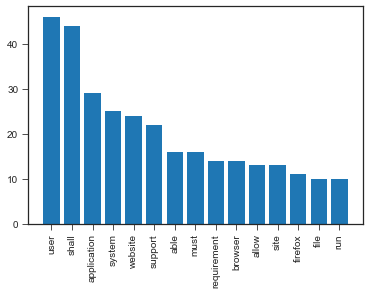

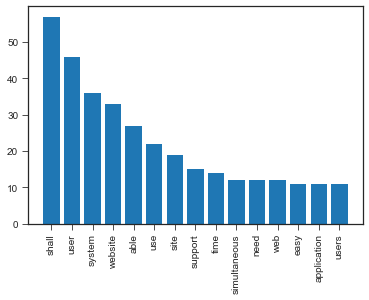

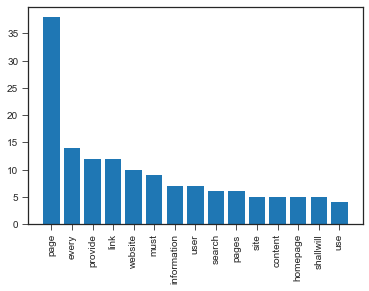

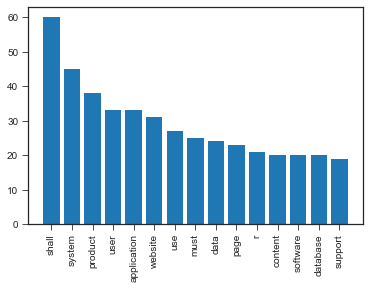

In [41]:

plt.figure()
#ax1 = f.add_subplot(331) # 131 это 1,3,1 это 1- сколько всего строк, 3 -сколько стоблцов, 1- порядковый номер графика

for i in range(len(requirement_classes)):
    plt.bar(class_dict[requirement_classes[i]].index,class_dict[requirement_classes[i]],label=requirement_classes[i])
    plt.xticks(rotation=90)
    plt.show()

    
    
#ax4.bar(class_dict[requirement_classes[3]].index,class_dict[requirement_classes[0]], label=requirement_classes[3],width = 0.5)
#ax2.plot(x,y2, label='function 2')
#ax2.legend()
#ax2.set_xlabel('Параметр')
#ax3.plot(x,y3)




In [42]:
bag_of_word = []
for i in requirement_classes:
    for j in class_dict[i].index:
        if not (j in bag_of_word):
            bag_of_word.append(j)
display(bag_of_word)

['user',
 'contact',
 'account',
 'information',
 'field',
 'shall',
 'number',
 'address',
 'website',
 'id',
 'include',
 'password',
 'email',
 'profile',
 'phone',
 'page',
 'application',
 'system',
 'able',
 'authorized',
 'login',
 'access',
 'must',
 'register',
 'data',
 'use',
 'log',
 'link',
 'provide',
 'site',
 'detail',
 'form',
 'u',
 'customer',
 'support',
 'help',
 'chatbot',
 'service',
 'customers',
 'video',
 'requirement',
 'database',
 'allow',
 'ensure',
 'display',
 'file',
 'stored',
 'document',
 'content',
 'product',
 'download',
 'different',
 'etc',
 'downloadable',
 'resume',
 'error',
 'message',
 'r',
 'priority',
 'failure',
 'one',
 'view',
 'item',
 'button',
 'search',
 'name',
 'homepage',
 'progress',
 'company',
 'home',
 'instructor',
 'language',
 'web',
 'available',
 'url',
 'cm',
 'navigation',
 'navigate',
 'bar',
 'main',
 'easily',
 'notify',
 'gpm',
 'notification',
 'buyer',
 'change',
 'sale',
 'enable',
 'security',
 'owner',
 'rese

In [43]:
for i in bag_of_word:
    data[i] = 0

In [44]:
#data.loc[[1],['lemmatized_requirement']].str()

Добавляем пробелы в начало и конецтекста, чтобы анализировать все выделяемые пробелом в тексте  слова

In [45]:
data['lemmatized_requirement'] = data['lemmatized_requirement'].apply(lambda x: str(' '+ x + ' '))

In [46]:
data.lemmatized_requirement.head(2)

0     system shall allow user update billing contact information via my account section website 
1                                                                 view user profile information 
Name: lemmatized_requirement, dtype: object

In [47]:
for word in bag_of_word:
    data[word]=data['lemmatized_requirement'].apply(lambda x: x.count(str (' ' + word + ' ')))

In [48]:
data.head()

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards",number_of_classes,lemmatized_requirement,user,contact,account,information,field,shall,number,address,website,id,include,password,email,profile,phone,page,application,system,able,authorized,login,access,must,register,data,use,log,link,provide,site,detail,form,u,customer,support,help,chatbot,service,customers,video,requirement,database,allow,ensure,display,file,stored,document,content,product,download,different,etc,downloadable,resume,error,message,r,priority,failure,one,view,item,button,search,name,homepage,progress,company,home,instructor,language,web,available,url,cm,navigation,navigate,bar,main,easily,notify,gpm,notification,buyer,change,sale,enable,security,owner,reset,characters,payment,card,credit,transaction,within,time,performance,load,second,seconds,image,may,category,add,listing,find,result,searching,title,privacy,social,medium,share,channel,browser,firefox,run,simultaneous,need,easy,users,every,pages,shallwill,software
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,system shall allow user update billing contact information via my account section website,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,view user profile information,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,password reminder reset handled website,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,User accounts are password protected,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,user account password protected,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Account info change access,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,account info change access,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [49]:
features = data[requirement_classes]

In [50]:
#data.loc[1385,'lemmatized_requirement']

**Визуализация общих слов**

In [51]:
all_words = data['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()


In [52]:
all_words

user             475
shall            361
page             260
system           201
website          177
                ... 
loginscreen        1
enforces           1
encountered        1
notificatrion      1
escape             1
Length: 2733, dtype: int64

<BarContainer object of 30 artists>

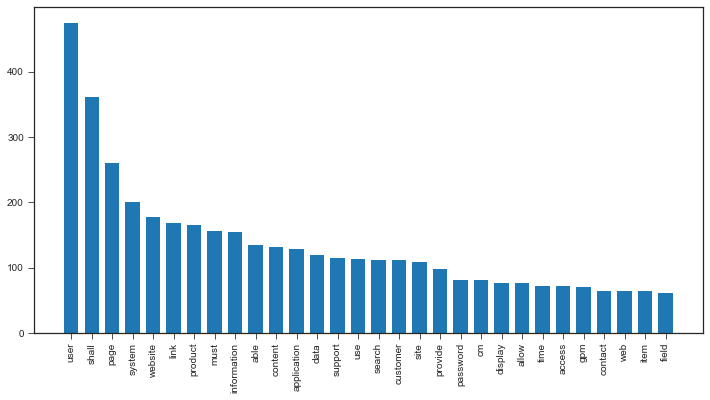

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.bar(all_words.index.values[:30], all_words.values[:30],width=0.7)

## **Построим облако слов**

Ориентировался на статью: 

https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [54]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [55]:
!pip install wordcloud

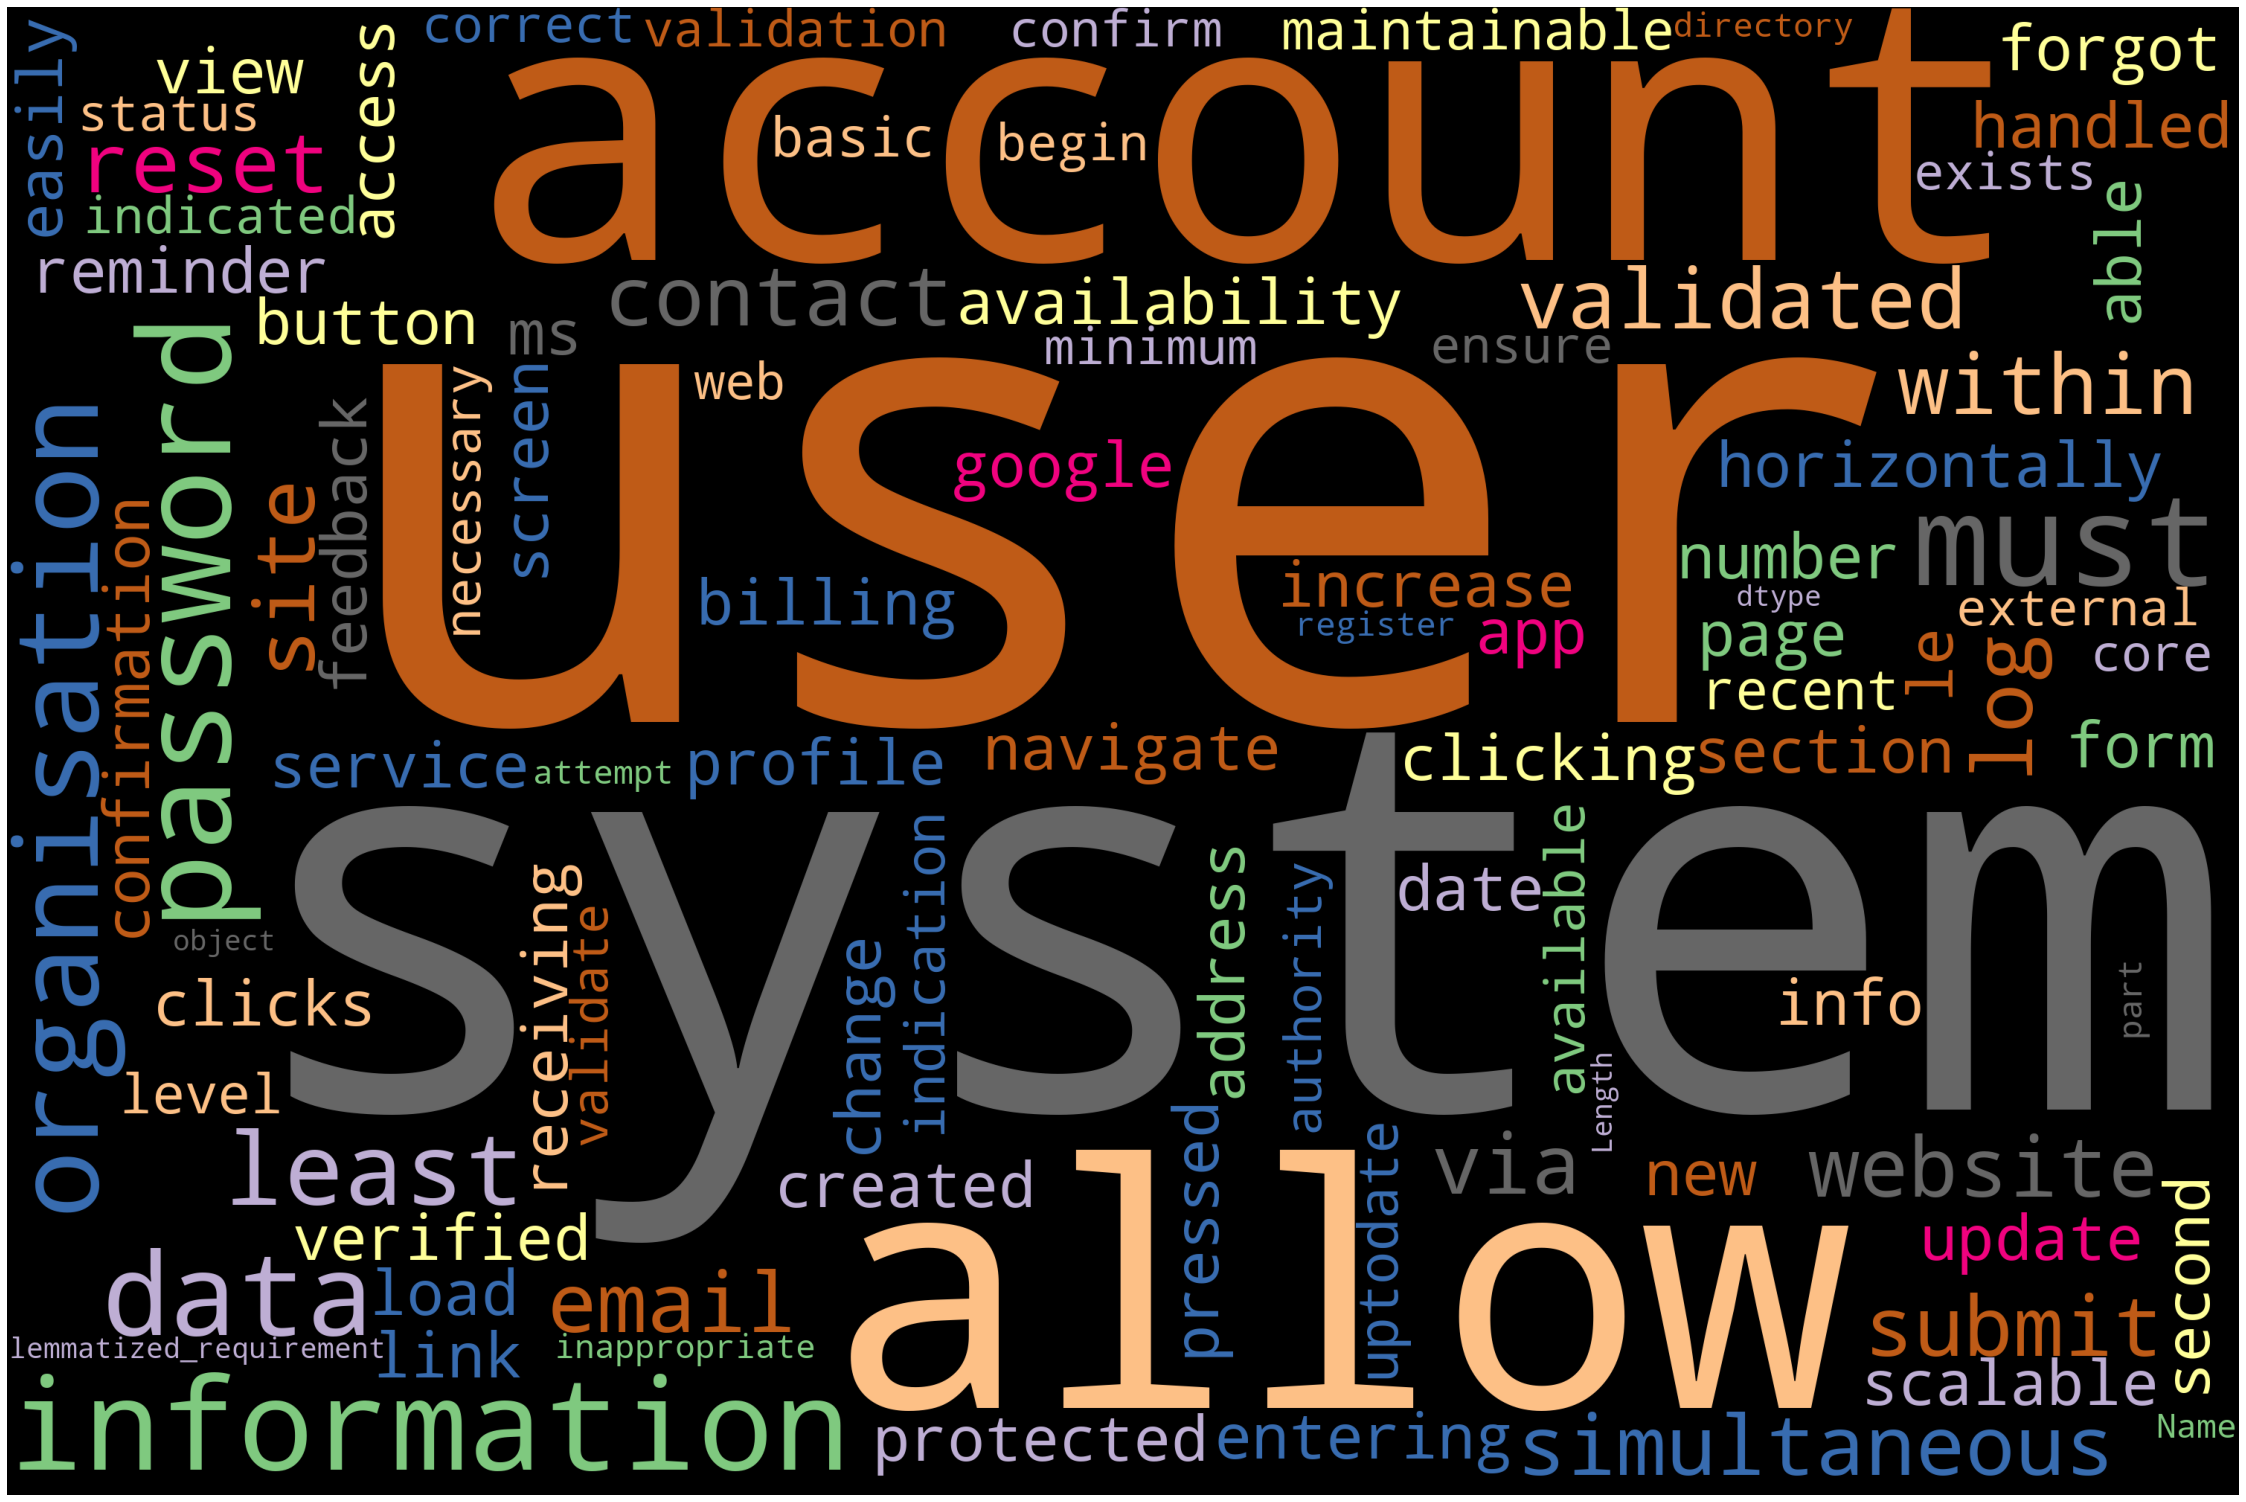

In [56]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, colormap='Accent', collocations=False).generate(str(data.lemmatized_requirement))
# Plot
plot_cloud(wordcloud)

впишем облако слов в картинку и поменяем цветовую палитру

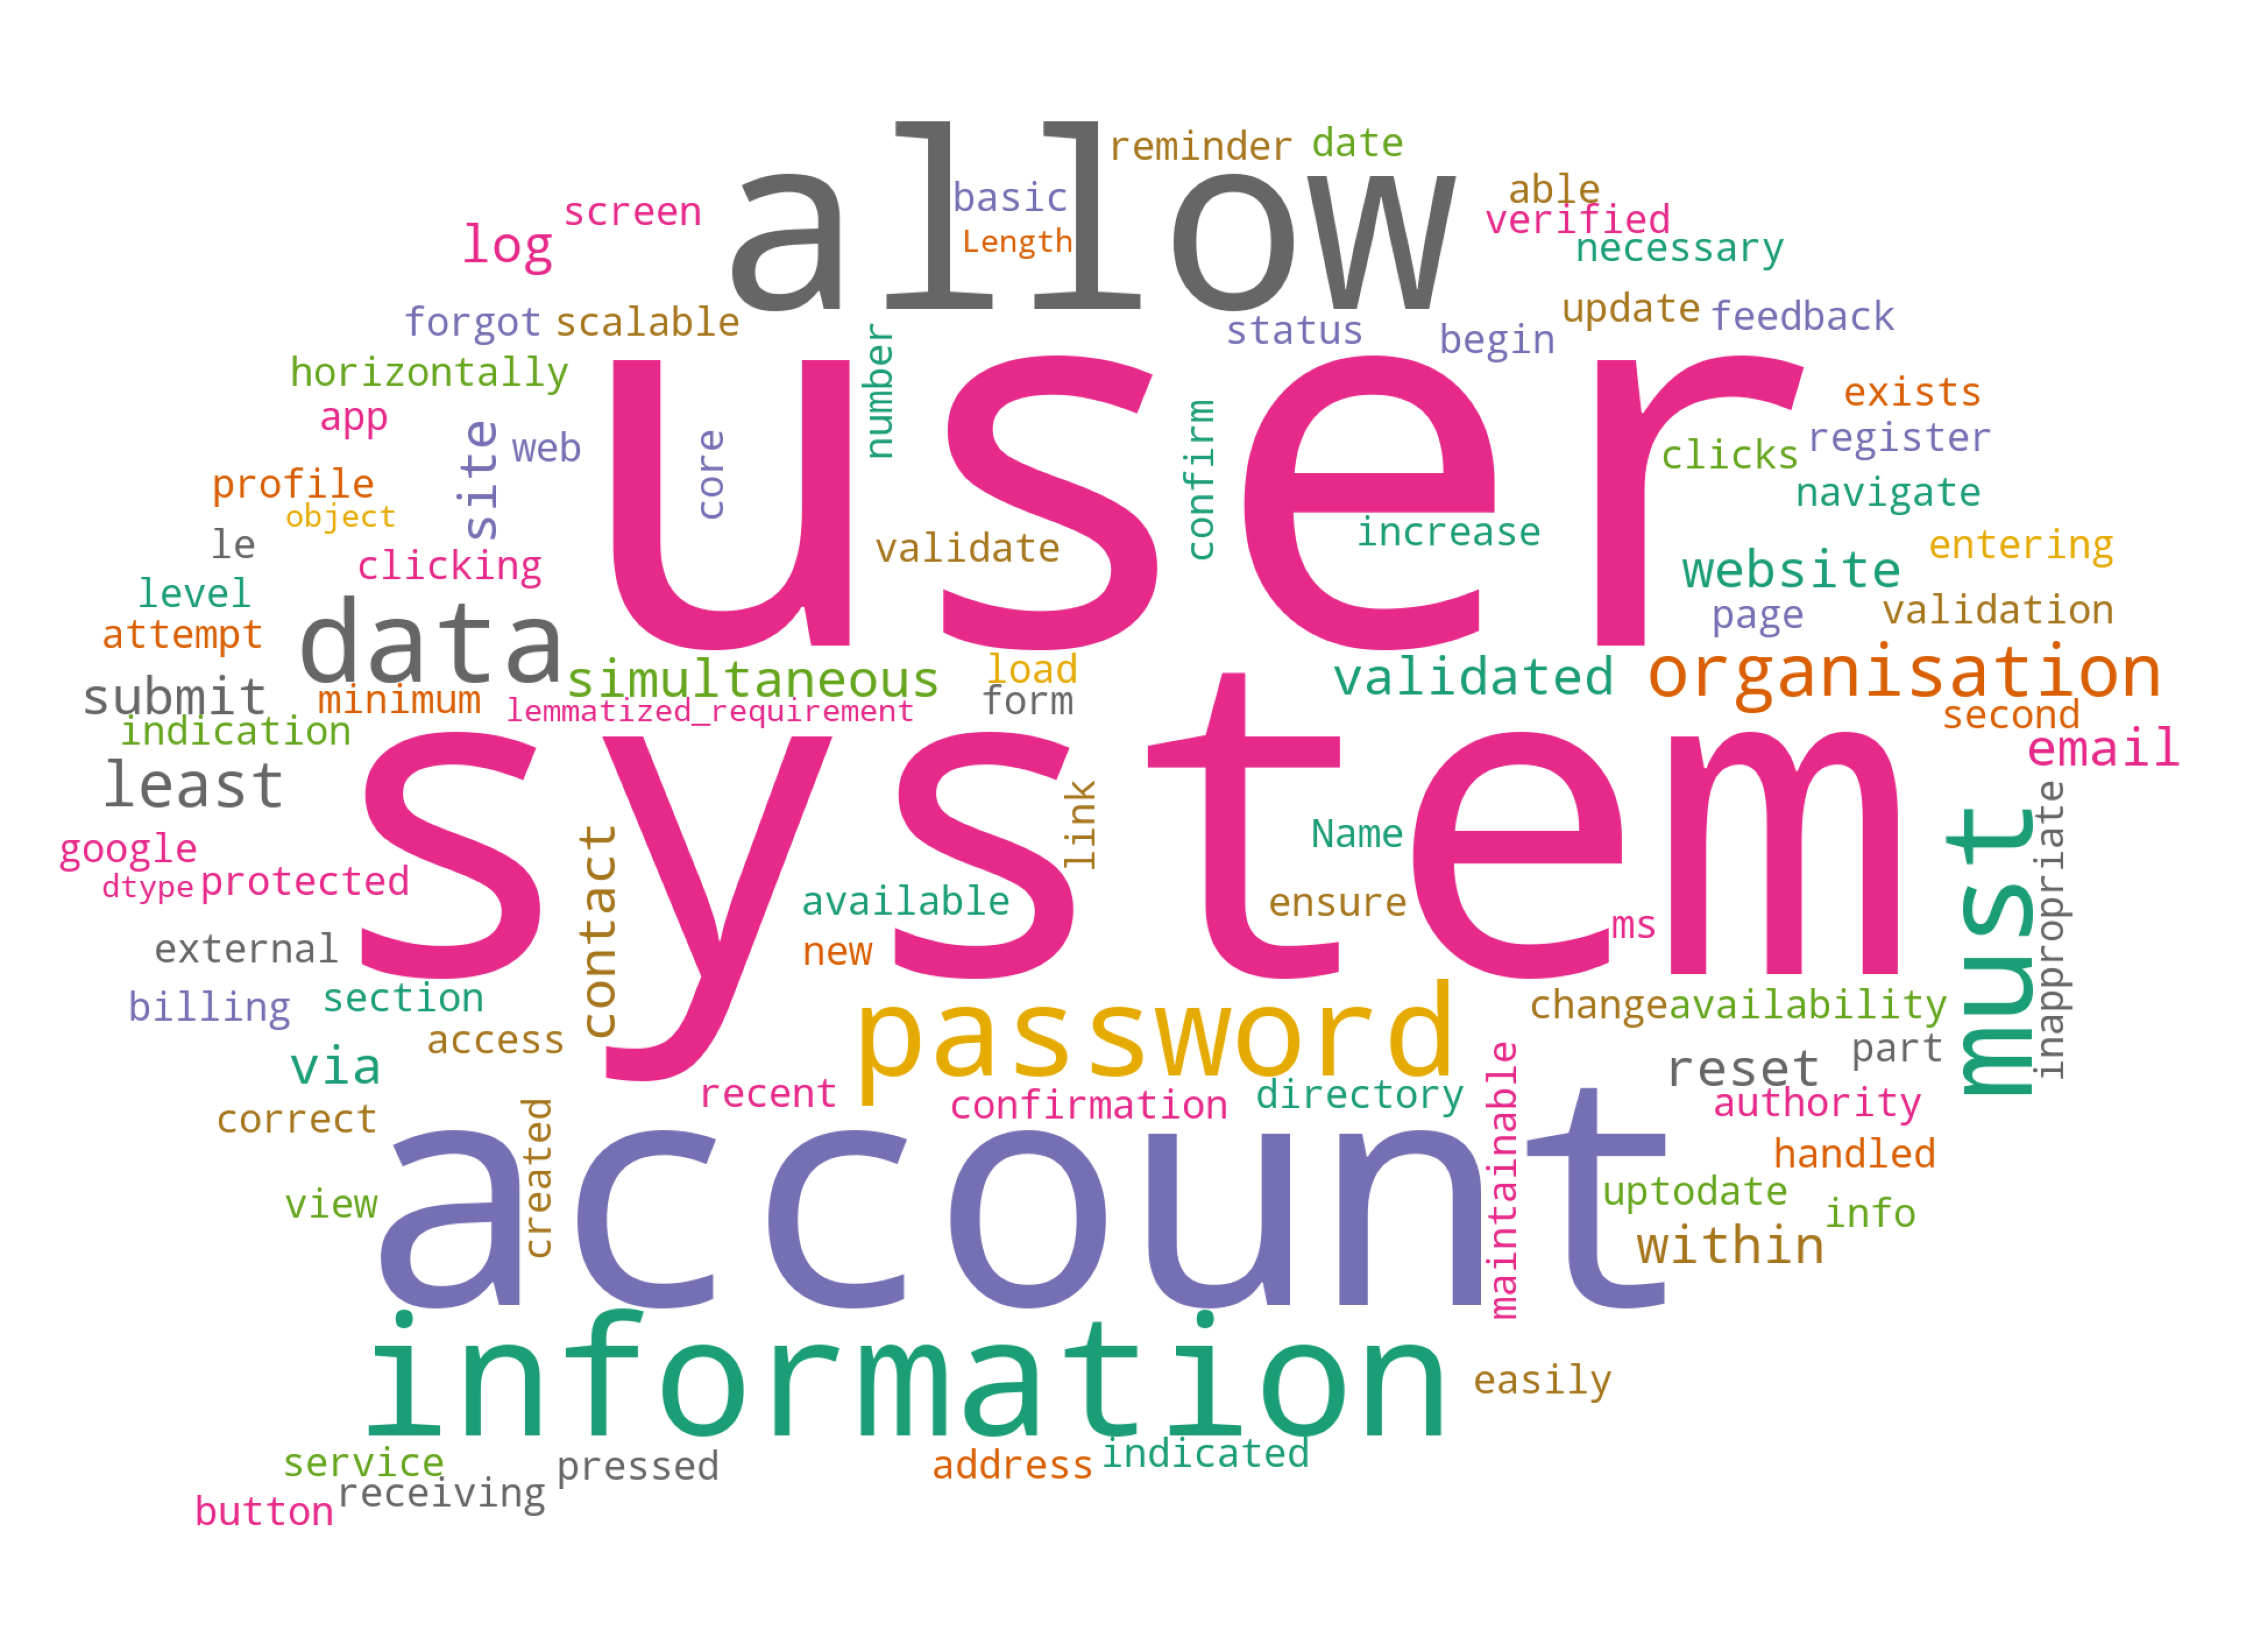

In [57]:
# Import package
from PIL import Image
from wordcloud import WordCloud
# Generate word cloud
mask = np.array(Image.open('comment1.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Dark2', collocations=False, mask=mask).generate(str(data.lemmatized_requirement))
# Plot
plot_cloud(wordcloud)

In [58]:
data.head()

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards",number_of_classes,lemmatized_requirement,user,contact,account,information,field,shall,number,address,website,id,include,password,email,profile,phone,page,application,system,able,authorized,login,access,must,register,data,use,log,link,provide,site,detail,form,u,customer,support,help,chatbot,service,customers,video,requirement,database,allow,ensure,display,file,stored,document,content,product,download,different,etc,downloadable,resume,error,message,r,priority,failure,one,view,item,button,search,name,homepage,progress,company,home,instructor,language,web,available,url,cm,navigation,navigate,bar,main,easily,notify,gpm,notification,buyer,change,sale,enable,security,owner,reset,characters,payment,card,credit,transaction,within,time,performance,load,second,seconds,image,may,category,add,listing,find,result,searching,title,privacy,social,medium,share,channel,browser,firefox,run,simultaneous,need,easy,users,every,pages,shallwill,software
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,system shall allow user update billing contact information via my account section website,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,view user profile information,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,password reminder reset handled website,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,User accounts are password protected,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,user account password protected,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Account info change access,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,account info change access,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Построим облако слов для класса Verification of Design and Content 

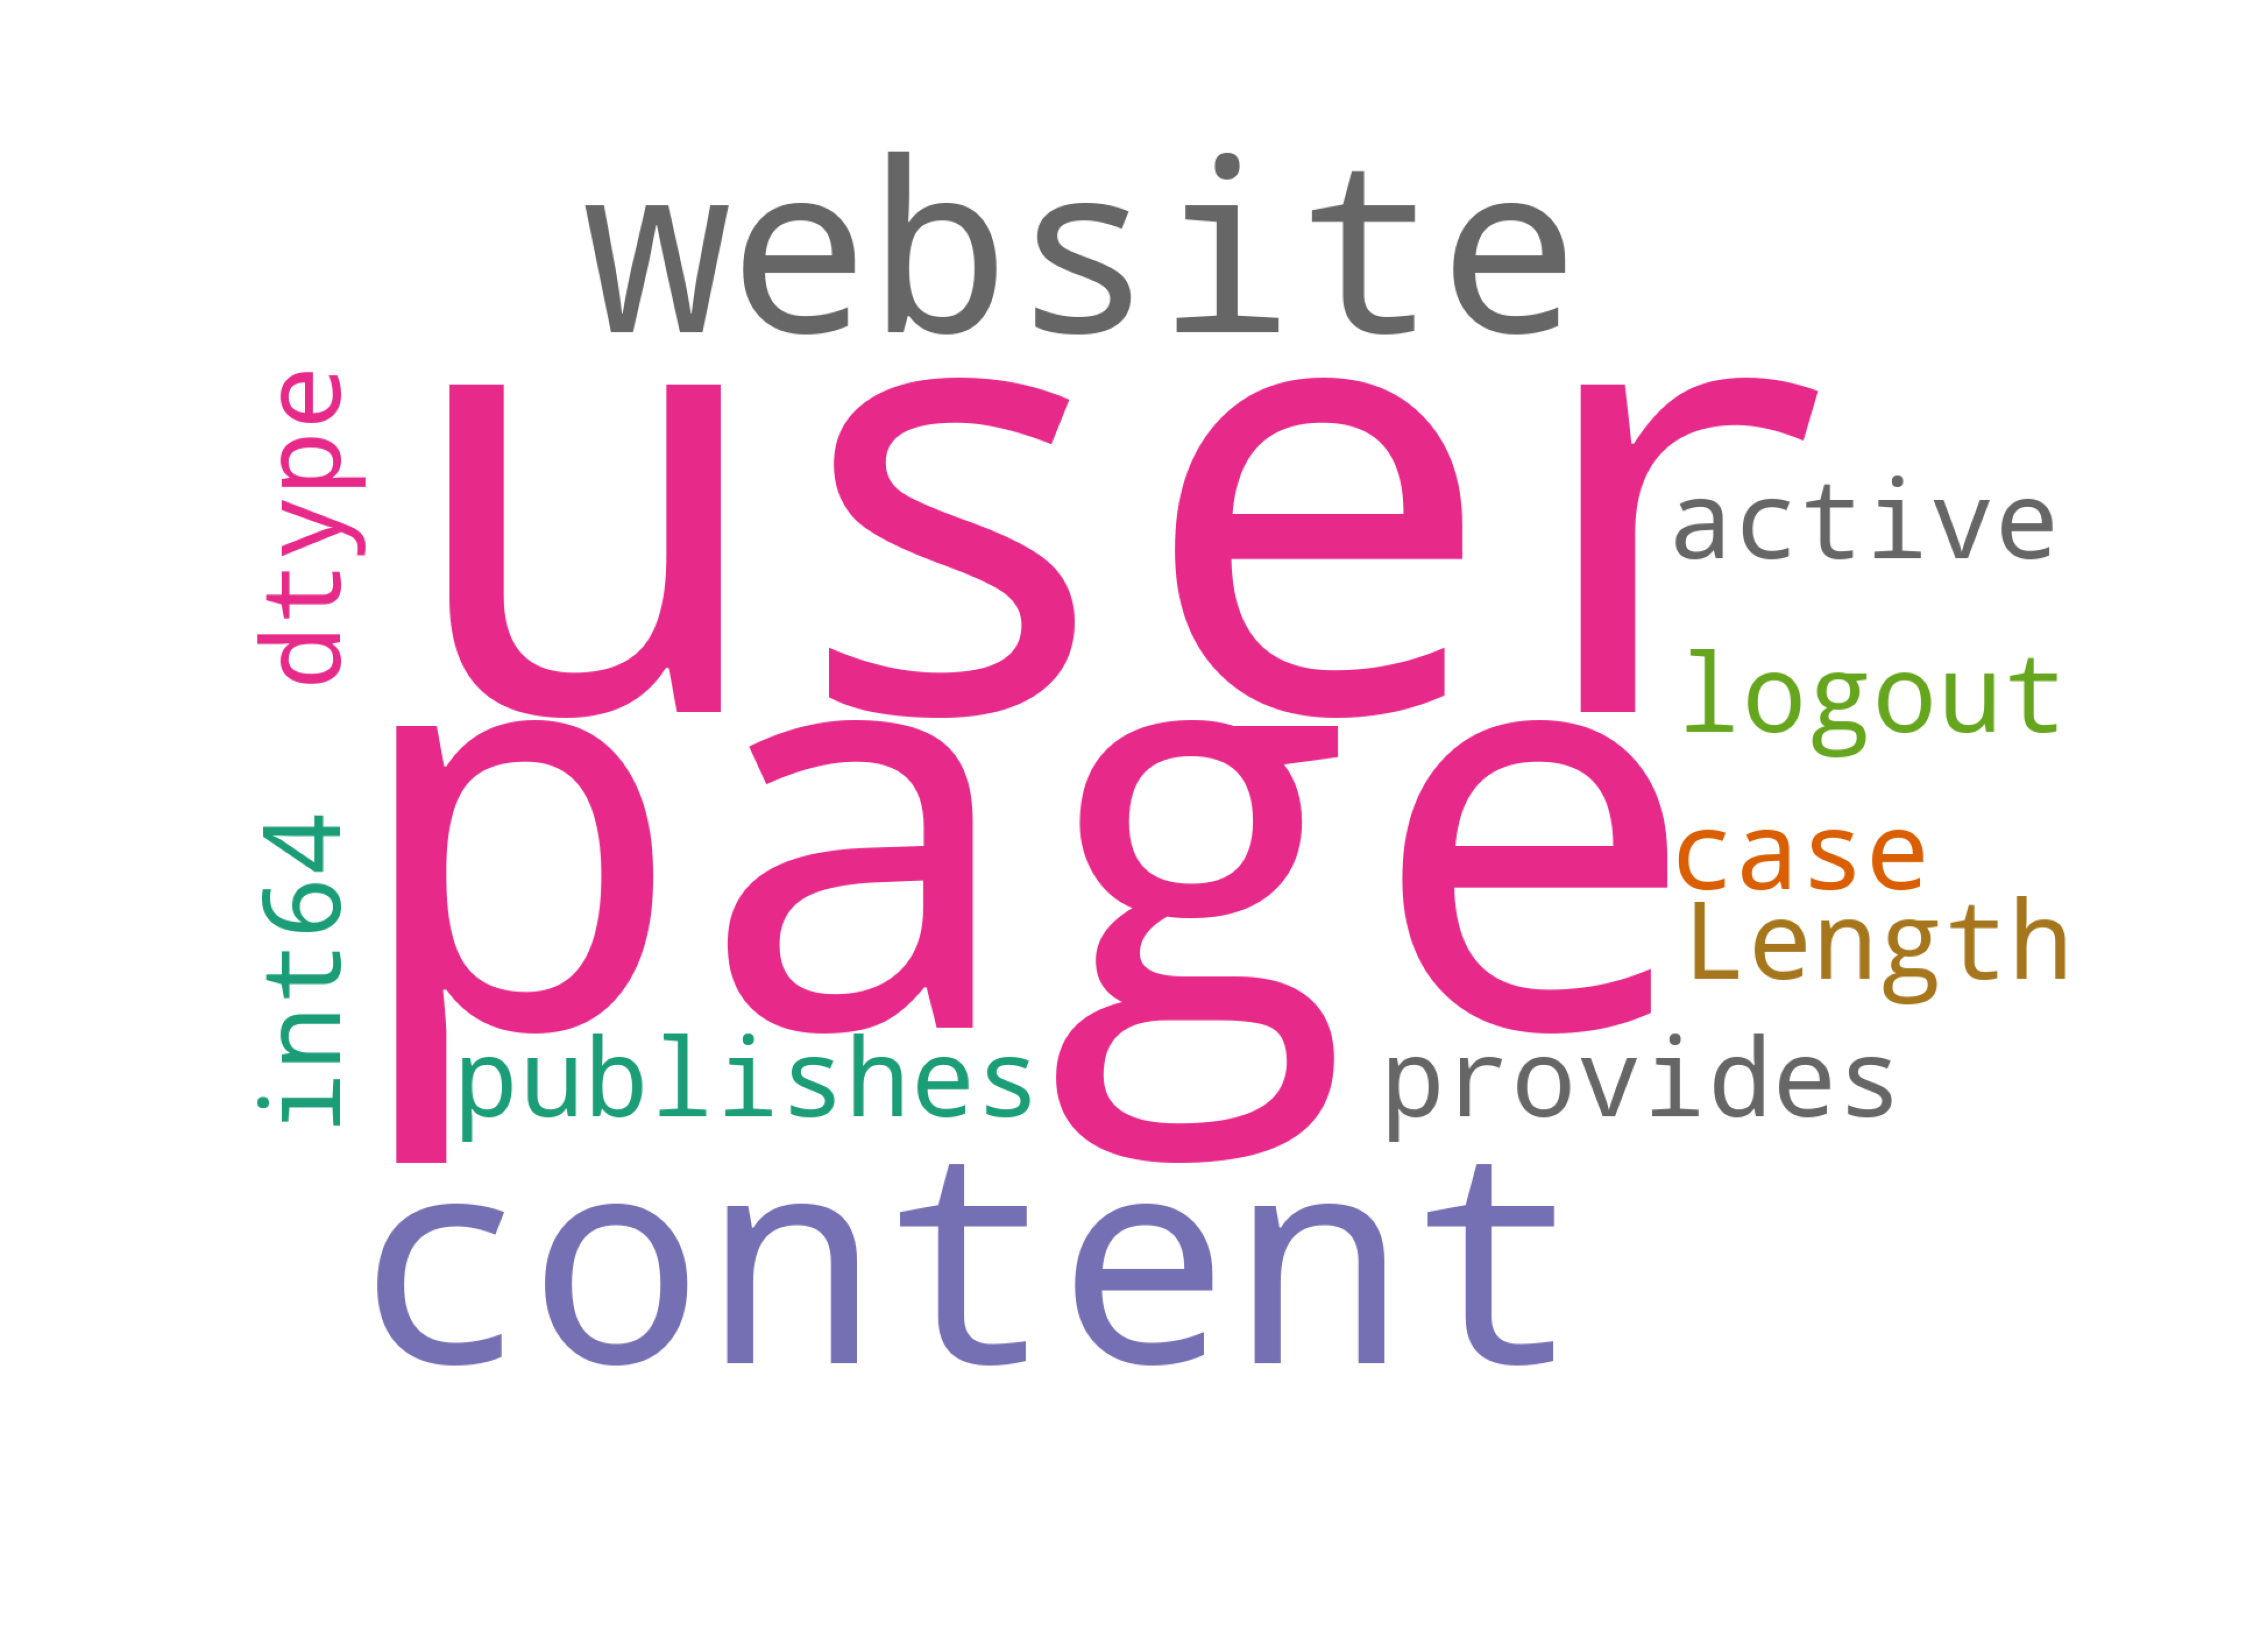

In [59]:
class1_words = data[data['Verification of Design and Content']==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()
mask = np.array(Image.open('comment1.png'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Dark2', collocations=False, mask=mask).generate(str(class1_words))
# Plot
plot_cloud(wordcloud)

Сопоставим с гистограммой

<Figure size 432x288 with 0 Axes>

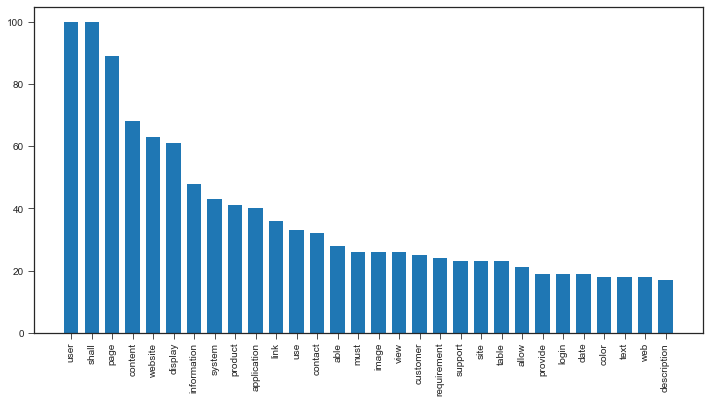

<Figure size 432x288 with 0 Axes>

In [60]:
class1_words = data[data['Verification of Design and Content']==1]['lemmatized_requirement'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.bar(class1_words.index.values[0:30], class1_words.values[0:30],width=0.7)
plt.figure()

In [61]:
class1_words.head(20)


user           100
shall          100
page            89
content         68
website         63
display         61
information     48
system          43
product         41
application     40
link            36
use             33
contact         32
able            28
must            26
image           26
view            26
customer        25
requirement     24
support         23
dtype: int64

# Нормализация

In [62]:
from sklearn import preprocessing

In [63]:
data[bag_of_word] = preprocessing.normalize(data[bag_of_word])

In [64]:
data.head()

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards",number_of_classes,lemmatized_requirement,user,contact,account,information,field,shall,number,address,website,id,include,password,email,profile,phone,page,application,system,able,authorized,login,access,must,register,data,use,log,link,provide,site,detail,form,u,customer,support,help,chatbot,service,customers,video,requirement,database,allow,ensure,display,file,stored,document,content,product,download,different,etc,downloadable,resume,error,message,r,priority,failure,one,view,item,button,search,name,homepage,progress,company,home,instructor,language,web,available,url,cm,navigation,navigate,bar,main,easily,notify,gpm,notification,buyer,change,sale,enable,security,owner,reset,characters,payment,card,credit,transaction,within,time,performance,load,second,seconds,image,may,category,add,listing,find,result,searching,title,privacy,social,medium,share,channel,browser,firefox,run,simultaneous,need,easy,users,every,pages,shallwill,software
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,system shall allow user update billing contact information via my account section website,0.353553,0.353553,0.353553,0.353553,0.0,0.353553,0.0,0.0,0.353553,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,View User profile information,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,view user profile information,0.500000,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Password reminders and resets are handled by the website,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,password reminder reset handled website,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.577350,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Выявление признаков из датасета

Составляем набор признаков на основе текста dataframe

Кол-во слов в тексте требования:

In [93]:
data['words_in_requirement'] = data['requirement_text'].str.split().apply(len)

Кол-во слов в тексте лемматизированного требования

In [94]:
data['words_in_lemmatized_req'] = data['lemmatized_requirement'].str.split().apply(len)

Исключено слов при лемматизации

In [95]:
data['words_diffence'] = data['words_in_requirement']-data['words_in_lemmatized_req']

In [96]:
data.head(1)

,req_no,requirement_text,Verification of Account Details and Settings,Verification of the Authentication and Authorization process,Verification of Contact Details,Verification of Customer Support,Verification of Data Integrity and Consistency,Verification of Design and Content,Verification of Downloads,Verification of Error Handling,Verification of Features and Functions,Verification of Forms and Validation of Input,Verification of Home Page,Verification of Language Compatibility,Verification of Links,Verification of Navigation,Verification of Notifications and Alerts,Verification of Password Policy and Setup,Verification of the Payment flow and details,Verification of Performance,Verification of the Product Page and Products,Verification of Search and Search Engine Optimization(SEO),Verification of Security and Privacy Policy Set Up,Verification of Social Media Links and Icons,Verification of Supportability and Device Compatibility,Verification of Usability and Accessibility,Verification of all Web Pages in the website,"Verification of Integration, Maintenance of the System and Web Standards",number_of_classes,lemmatized_requirement,user,contact,account,information,field,shall,number,address,website,id,include,password,email,profile,phone,page,application,system,able,authorized,login,access,must,register,data,use,log,link,provide,site,detail,form,u,customer,support,help,chatbot,service,customers,video,requirement,database,allow,ensure,display,file,stored,document,content,product,download,different,etc,downloadable,resume,error,message,r,priority,failure,one,view,item,button,search,name,homepage,progress,company,home,instructor,language,web,available,url,cm,navigation,navigate,bar,main,easily,notify,gpm,notification,buyer,change,sale,enable,security,owner,reset,characters,payment,card,credit,transaction,within,time,performance,load,second,seconds,image,may,category,add,listing,find,result,searching,title,privacy,social,medium,share,channel,browser,firefox,run,simultaneous,need,easy,users,every,pages,shallwill,software,words_in_requirement,words_in_lemmatized_req,words_diffence
0,1,System shall allow users to update their billing and contact information via the “My Account” section of the website,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,system shall allow user update billing contact information via my account section website,0.353553,0.353553,0.353553,0.353553,0.0,0.353553,0.0,0.0,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,13,6


Теперь выведем признаки по словам. Для этого определим самые часто-употребимые слова в каждом классе.

# Разбиение на обучающую и тестовую выборки

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
target = requirement_classes
features = bag_of_word

In [100]:
data[bag_of_word]

,user,contact,account,information,field,shall,number,address,website,id,include,password,email,profile,phone,page,application,system,able,authorized,login,access,must,register,data,use,log,link,provide,site,detail,form,u,customer,support,help,chatbot,service,customers,video,requirement,database,allow,ensure,display,file,stored,document,content,product,download,different,etc,downloadable,resume,error,message,r,priority,failure,one,view,item,button,search,name,homepage,progress,company,home,instructor,language,web,available,url,cm,navigation,navigate,bar,main,easily,notify,gpm,notification,buyer,change,sale,enable,security,owner,reset,characters,payment,card,credit,transaction,within,time,performance,load,second,seconds,image,may,category,add,listing,find,result,searching,title,privacy,social,medium,share,channel,browser,firefox,run,simultaneous,need,easy,users,every,pages,shallwill,software
0,0.353553,0.353553,0.353553,0.353553,0.0,0.353553,0.000000,0.000000,0.353553,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.353553,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.353553,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.500000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.5,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.577350,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.577350,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.577350,0.000000,0.577350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.577350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.57735,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Разбиение на рандомные обучающую и тестовую выборки

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=77)
print('Среднее значение целевой переменной\nОбучающая выборка:', np.round(y_train.mean(),3))
print('Тестовая выборка:', np.round(y_test.mean(),3))

Среднее значение целевой переменной
Обучающая выборка: Verification of Account Details and Settings                                0.017
Verification of the Authentication and Authorization process                0.097
Verification of Contact Details                                             0.026
Verification of Customer Support                                            0.020
Verification of Data Integrity and Consistency                              0.033
Verification of Design and Content                                          0.211
Verification of Downloads                                                   0.018
Verification of Error Handling                                              0.039
Verification of Features and Functions                                      0.230
Verification of Forms and Validation of Input                               0.040
Verification of Home Page                                                   0.029
Verification of Language Compatibility     

In [102]:
X_train.count()/(X_train.count()+X_test.count())

user           0.8
contact        0.8
account        0.8
information    0.8
field          0.8
              ... 
users          0.8
every          0.8
pages          0.8
shallwill      0.8
software       0.8
Length: 127, dtype: float64

Разбиение на стратифицированные обучающую и тестовую выборки по каждому классу

Создать функцию 

вход Dataframe,  целевая колонка, features

выход: X_train, X_test, y_train, y_test

In [103]:
def split_train_test (dataframe_, target_, features_):
        
        X_train, X_test, y_train, y_test = train_test_split(dataframe_[features_],dataframe_[target_],test_size=0.2, random_state=77, stratify=dataframe_[target_])
        
        return X_train, X_test, y_train, y_test

In [84]:
#X_train, X_test, y_train, y_test = [],[],[],[]
#for i in range(len(requirement_classes)):
#    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(data[features], data[target], test_size=0.2, random_state=77, stratify=data[target[i]])
#    print('Среднее значение целевой переменной\nОбучающая выборка:', np.round(y_train.mean(),3)[i])
#    print('Тестовая выборка:', np.round(y_test.mean(),3)[i])

IndexError: list assignment index out of range

цикл 
dataframe в список 
[X_train, X_test, y_train, y_test] – значение
ключ - название класса

## Разбиение на тестовую и валидационную выборки для самого большого класса "Verification of Features and Functions"

In [106]:
data['Verification of Features and Functions'].value_counts()

0    1065
1     325
Name: Verification of Features and Functions, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = split_train_test(data,'Verification of Features and Functions', class_dict['Verification of Features and Functions'].index)

# Обучение модели

Так как классификация будет проводиться по каждому из классов независимо, разбиение на тестовую и обучающую выборки будет проводиться для каждого из классов отдельно

In [136]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression() # Используем модель с параметрами по умолчанию
model_lr.fit(X_train, y_train)

LogisticRegression()

In [138]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() # Используем модель с параметрами по умолчанию
model_nb.fit(X_train, y_train)

GaussianNB()

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier() # Используем модель с параметрами по умолчанию
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier() # Используем модель с параметрами по умолчанию
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
from sklearn.svm import SVC
model_svc = SVC() # Используем модель с параметрами по умолчанию
model_svc.fit(X_train, y_train)

SVC()

In [143]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier() # Используем модель с параметрами по умолчанию
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
from sklearn.metrics import accuracy_score

In [150]:
print('Логистическая регрессия')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_lr.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_lr.predict(X_test)), end='\n\n')

print('Наивный Байес')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_nb.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_nb.predict(X_test)), end='\n\n')

print('K-ближайших соседей')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_knn.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_knn.predict(X_test)), end='\n\n')

print('Деревья решений')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_dtc.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_dtc.predict(X_test)), end='\n\n')

print('Метод опорных векторов')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_svc.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_svc.predict(X_test)), end='\n\n')

print('Random Forest')
print('Точность на обучающей выборке: ', accuracy_score(y_train, model_rf.predict(X_train)))
print('Точность на тестовой выборке: ', accuracy_score(y_test, model_rf.predict(X_test)), end='\n\n')

Логистическая регрессия
Точность на обучающей выборке:  0.8066546762589928
Точность на тестовой выборке:  0.8237410071942446

Наивный Байес
Точность на обучающей выборке:  0.7967625899280576
Точность на тестовой выборке:  0.8201438848920863

K-ближайших соседей
Точность на обучающей выборке:  0.841726618705036
Точность на тестовой выборке:  0.8273381294964028

Деревья решений
Точность на обучающей выборке:  0.9100719424460432
Точность на тестовой выборке:  0.8093525179856115

Метод опорных векторов
Точность на обучающей выборке:  0.8408273381294964
Точность на тестовой выборке:  0.8273381294964028

Random Forest
Точность на обучающей выборке:  0.9100719424460432
Точность на тестовой выборке:  0.8165467625899281



In [155]:
X_test.iloc[0]

user           0.0
shall          0.0
page           0.0
able           0.0
application    0.0
system         0.0
allow          0.0
field          0.0
must           0.0
view           0.0
link           0.0
website        0.0
item           0.0
button         0.0
search         0.0
Name: 177, dtype: float64

In [182]:
model_svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [180]:
X_test.loc[1056]

user           0.00000
shall          0.00000
page           0.00000
able           0.00000
application    0.00000
system         0.00000
allow          0.00000
field          0.57735
must           0.00000
view           0.00000
link           0.00000
website        0.00000
item           0.00000
button         0.00000
search         0.00000
Name: 1056, dtype: float64

In [184]:
y_test

177     0
1318    0
799     0
341     1
1056    1
       ..
217     0
1316    1
1340    0
647     0
1234    1
Name: Verification of Features and Functions, Length: 278, dtype: int64

<a id="*3*"></a>
### **Выводы**

1. В используемом dataset данные для задачи берутся из колонки с текстом требования. 
2. В качестве разметки используются колонки классов со значениями типа int64 и принимает 2 значения: '0' или '1'
3. Большинство требований (845) относится к 1 классу, к 2 классам относится 385 требований. К 8, 9, 10 классам отноится по 1 требованию.
4. Некоторые классы требований представлены на порядок большим количеством требований, чем другие:

    Verification of Features and Functions   325

    Verification of Account Details and Settings   21
4. Нужна ли кросс-валидация?.. – метод-гипотеза


**TO DO**


*   Посмотреть, есть или зависимость от количества слов и классов
*   Посмотреть зависимость количество встречаемых слов для разных классов



